# Signal Processing in Biomedical - Midterm Project


## Introduction

In [6]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

ECG = open('aami3a.dat','rb')
ECG_Signal = np.fromfile(ECG,count=-1,dtype=np.uint16)
print('\n The length of the file is: ' + str(len(ECG_Signal)) )



 The length of the file is: 43081


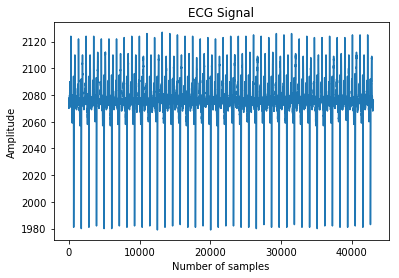

In [7]:
plt.plot(ECG_Signal[:43081])
plt.title('ECG Signal')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ECG.close() 

The average rate of a person is 60-100 bpm.

If we take for instance 80 bpm then,
80/60 = 1.3333 (beats per second)
Now, since we want 5 beats in the signal
Therefore, 1.3333*5 = 6.6666
Thus, number of signals = 6.6666/(1.3333*10e-3)
                        = 5000.125 which is approximately 5000.



 The number of samples for 5 beats in signal: 5000


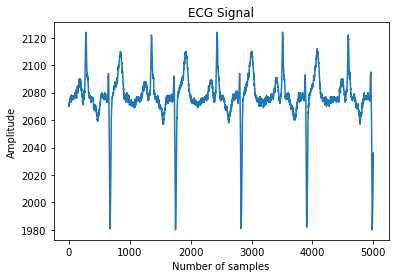

In [10]:
x=np.arange(0,5000/75e1,1/75e1)  
print('\n The number of samples for 5 beats in signal: ' + str(len(x)) )
plt.plot(ECG_Signal[:5000])
plt.title('ECG Signal')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ECG.close() 

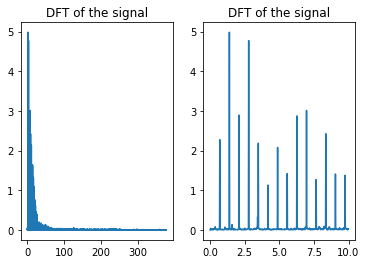

In [23]:
Line=ECG_Signal[:43081]
data=Line-np.mean(Line)
L=len(data)

f=np.arange(0,75e1/2,75e1/43081)
Y=np.fft.fft(data)
Pyy=abs(Y)/L

plt.subplot(121)
plt.plot(f, Pyy[:21541])
plt.title('DFT of the signal')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

inx=np.where(f>10)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of the signal')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

In [25]:
y=np.amax(Pyy)
print "Maximum=" + str(x)

Maximum=[  0.00000000e+00   1.33333333e-03   2.66666667e-03 ...,   6.66266667e+00
   6.66400000e+00   6.66533333e+00]


In [55]:
from scipy import signal

def GenSinusFunctionWithNoise(freq,tend,lambda_step_log,noise_level):
    # freq is in MHz, t_end in us, and lambda_step is the sampling rate in log10 so we can visualize effects of high resolution sampling all the way to coarse
    # noise_level is the amplitude between 0 and 1
    lambda_step=10.0**lambda_step_log  # we put the normalize sampling rate in linear
    dt=1./(freq*1e6)*lambda_step # this is the time step
    t=np.arange(0,tend/1e6,dt)   
    s=np.sin(np.pi*2*freq*1e6*t)+(np.random.random(t.shape)-0.5)*noise_level
    return dt,t,s

def TestLPButterworthFilter(order,SignalFreq,CutFrequency,tend,lambda_step_log,noise_level):
    dt,t,s=GenSinusFunctionWithNoise(SignalFreq,tend,lambda_step_log,noise_level)
    NyquistFreq=(1./dt/2.)
    RatioCut=CutFrequency*1e6/NyquistFreq
    b_c, a_c = signal.butter(order, RatioCut) #we design the filter
    s_filtered=signal.lfilter(b_c,a_c,s) #we filter the signal
    w,h=signal.freqz(b_c,a_c,worN=2000) #and we calculate the response function of the filter
    
    plt.figure(figsize=(16,6))
    s1=plt.subplot(1,2,1)
    s1.plot(t*1e6,s,'g:',t*1e6,s_filtered,'b-')
    s1.legend(['noisy image','filtered signal'])
    s1.set_xlabel('$\mu$s')
    plt.show()

    


v=interact(TestLPButterworthFilter,order=IntSlider(value=6,min=2, max=12, step=1,width='400px'),
           SignalFreq=FloatSlider(value=1.,min=0.1,max=2.0,step=0.1,width='400px'),
           CutFrequency=FloatSlider(value=2.,min=0.,max=4.0,step=0.1,width='400px'),
           tend=FloatSlider(value=10.,min=1.,max=30.,step=1.,width='400px'),
           lambda_step_log=FloatSlider(value=-2.,min=-4.,max=np.log10(0.5),step=0.01,width='400px'),
           noise_level=FloatSlider(value=0.5,min=0.,max=20.,step=0.05,width='400px'));
    
    